<a href="https://colab.research.google.com/github/ImadT/Fraud-detection/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exporter les donnees du drive



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

pd.set_option("display.max_rows", None) 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_identity = pd.read_csv("/content/drive/MyDrive/2020 2021/Projet ML/train_identity.csv")
print(train_identity.shape)
train_identity.head()

(144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
train_transaction = pd.read_csv("/content/drive/MyDrive/2020 2021/Projet ML/train_transaction.csv")
print(train_transaction.shape)
train_transaction.head()

(590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test_identity = pd.read_csv("/content/drive/MyDrive/2020 2021/Projet ML/test_identity.csv")
print(test_identity.shape)
test_identity.head()

(141907, 41)


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [6]:
test_transaction = pd.read_csv("/content/drive/MyDrive/2020 2021/Projet ML/test_transaction.csv")
print(test_transaction.shape)
test_transaction.head()

(506691, 393)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge Transaction and identity data

In [7]:
train = pd.merge(train_transaction, train_identity, how='left', 
                 on='TransactionID')

In [8]:
# rename columns for test_identity
test_identity.columns = train_identity.columns

test = pd.merge(test_transaction, test_identity, how='left', 
                 on='TransactionID')

#### Data Casting

In [9]:
"""
#catagorical variables

## Transaction variables
ProductCD
card1 - card6
addr1, addr2
P_emaildomain
R_emaildomain
M1 - M9

## Identity variables
DeviceType
DeviceInfo
id_12 - id_38
"""
#columns store the names of categorical variables
columns = ['ProductCD']+[f'card{i}' for i in range(1, 7)] + ['addr1','addr2']+['P_emaildomain']+['R_emaildomain']+[f'M{i}' for i in range(1,10)]+['DeviceType']+['DeviceInfo']+[f'id_{i}' for i in range(12,39)]

#cast columns to categorical variables
train[columns] = train[columns].astype('category')
test[columns] = test[columns].astype('category')


#train_transaction.info(verbose=True)
train[columns].head()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,DeviceInfo,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,NaN,T,T,T,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T


### Dealing with missing Data 

In [10]:
train.shape

(590540, 434)

In [11]:
test.shape

(506691, 433)

In [12]:
def getnotnull(data):
    total = data.count().sort_values()
    percent = (data.count() / data.shape[0]).sort_values()
    data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
    return data

In [13]:
existing_data_train = getnotnull(train)
existing_data_train.head(434).T

,id_24,id_25,id_07,id_08,id_21,id_26,id_27,id_23,id_22,dist2,D7,id_18,D13,D14,D12,id_04,id_03,D6,id_33,D9,D8,id_09,id_10,id_30,id_32,id_34,id_14,V142,V163,V161,V158,V141,V157,V155,V140,V153,V149,V148,V147,V146,...,V292,V291,V290,V287,V286,V285,V284,V280,V279,V306,V307,V305,V309,V310,V312,V308,V316,V317,V318,V319,TransactionAmt,TransactionDT,isFraud,C11,C12,C13,C14,C10,ProductCD,C7,C8,card1,C6,C5,C4,C3,C2,C1,C9,TransactionID
total,4747.000000,5132.00000,5155.000000,5155.000000,5159.000000,5163.000000,5169.000000,5169.000000,5169.000000,37627.000000,38917.000000,45113.000000,61952.000000,62187.000000,64717.00000,66324.000000,66324.000000,73187.000000,73289.000000,74926.000000,74926.000000,74926.000000,74926.000000,77565.000000,77586.000000,77805.000000,80044.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,81945.000000,...,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0
percent,0.008038,0.00869,0.008729,0.008729,0.008736,0.008743,0.008753,0.008753,0.008753,0.063716,0.065901,0.076393,0.104907,0.105305,0.10959,0.112311,0.112311,0.123932,0.124105,0.126877,0.126877,0.126877,0.126877,0.131346,0.131381,0.131752,0.135544,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,0.138763,...,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
existing_data_test = getnotnull(test)
existing_data_test.head(434).T

,id_24,id_25,id_26,id_07,id_08,id_21,id_27,id_23,id_22,dist2,id_18,D7,id_04,id_03,D12,id_30,id_32,id_33,id_14,id_34,id_10,id_09,D9,D8,V162,V161,V158,V157,V156,V155,V149,V153,V148,V147,V146,V142,V141,V140,V154,V163,...,V125,V130,V136,V132,card1,V133,ProductCD,TransactionAmt,TransactionDT,V134,V135,V120,V137,V131,V119,V108,V117,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V109,V110,V111,V112,V113,V114,V115,V116,V118,TransactionID
total,4740.000000,5039.000000,5047.000000,5059.000000,5059.000000,5059.000000,5062.00000,5062.00000,5062.00000,36436.00000,50875.000000,60133.000000,66481.000000,66481.000000,69254.000000,70659.000000,70671.000000,70671.000000,71357.000000,72175.000000,74338.000000,74338.000000,74338.000000,74338.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,...,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0
percent,0.009355,0.009945,0.009961,0.009984,0.009984,0.009984,0.00999,0.00999,0.00999,0.07191,0.100406,0.118678,0.131206,0.131206,0.136679,0.139452,0.139476,0.139476,0.140829,0.142444,0.146713,0.146713,0.146713,0.146713,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,0.149568,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
existing_data_train[existing_data_train['percent']>0.7].head(202).T

,M6,V41,V39,V38,V37,V40,V36,V52,V51,V35,V49,V42,V43,V50,V44,V45,V48,V47,V46,D4,P_emaildomain,V89,V90,V88,V92,V87,V93,V94,V84,V86,V91,V85,V83,V82,V81,V80,V79,V78,V77,V76,...,V292,V291,V290,V287,V286,V285,V284,V280,V279,V306,V307,V305,V309,V310,V312,V308,V316,V317,V318,V319,TransactionAmt,TransactionDT,isFraud,C11,C12,C13,C14,C10,ProductCD,C7,C8,card1,C6,C5,C4,C3,C2,C1,C9,TransactionID
total,421180.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421618.000000,496084.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,...,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0
percent,0.713212,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713874,0.713953,0.840051,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,...,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
existing_data_test[existing_data_test['percent']>0.7].head(202).T

,V44,V52,V51,V50,V48,V47,V46,V45,V43,V49,V41,V40,V39,V38,V37,V36,V35,V42,D4,P_emaildomain,addr2,addr1,V68,V67,V71,V73,V72,V66,V70,V74,V65,V60,V63,V62,V61,V59,V58,V57,V56,V55,...,V125,V130,V136,V132,card1,V133,ProductCD,TransactionAmt,TransactionDT,V134,V135,V120,V137,V131,V119,V108,V117,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V109,V110,V111,V112,V113,V114,V115,V116,V118,TransactionID
total,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429840.000000,437499.000000,441082.000000,441082.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,...,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0,506691.0
percent,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848322,0.848328,0.863443,0.870515,0.870515,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,0.974543,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 1. Drop columns with ratio of non missing data > 70%



In [17]:
train.drop(list(existing_data_train[existing_data_train['percent']<=0.7].index), axis = 1, inplace =True, errors = 'ignore')

In [18]:
test.drop(list(existing_data_test[existing_data_test['percent']<=0.7].index), axis = 1, inplace =True, errors = 'ignore')

In [19]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

len(intersection(list(train.columns), list(test.columns)))

200

In [20]:
train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=202)

#### pattern of each column

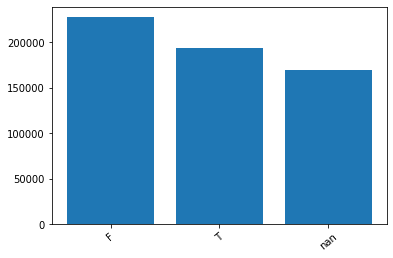

In [21]:
#M6
data = train['M6'].value_counts(dropna =False)

plt.figure()
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)
plt.show()

In [22]:
groupby_isFraud = dict(list(train.groupby('isFraud')))

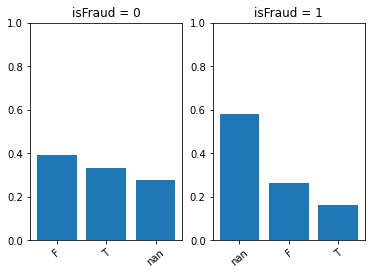

In [23]:
plt.figure()
plt.subplot(121)
plt.ylim(0.0,1.0)
data = groupby_isFraud[0]['M6'].value_counts(dropna =False)/groupby_isFraud[0].shape[0]
plt.title('isFraud = 0')
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)


plt.subplot(122)
plt.ylim(0.0,1.0)
data = groupby_isFraud[1]['M6'].value_counts(dropna =False)/groupby_isFraud[1].shape[0]
plt.title('isFraud = 1')
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)

plt.show()


On peut conclure que M6 ne suis pas un pattern. Du coup on la enleve.

In [24]:
# V{i}
train['V41'].value_counts()

1.0    421263
0.0       308
Name: V41, dtype: int64

In [25]:
# V{i}
train['V40'].value_counts()

0.0     357837
1.0      57473
2.0       4230
3.0       1046
4.0        400
5.0        209
6.0        145
7.0         78
8.0         50
10.0        29
9.0         26
14.0        16
11.0        14
12.0        12
13.0         3
15.0         1
23.0         1
24.0         1
Name: V40, dtype: int64

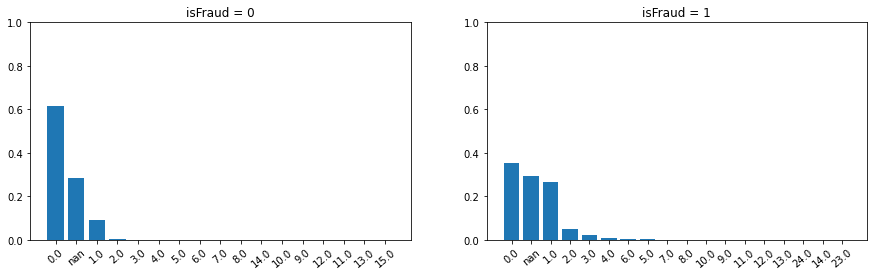

In [26]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.ylim(0.0,1.0)
data0 = groupby_isFraud[0]['V40'].value_counts(dropna =False)/groupby_isFraud[0].shape[0]
plt.title('isFraud = 0')
plt.bar(np.array(data0.index, dtype='str'), np.array(data0.values))
plt.xticks(rotation=40)


plt.subplot(122)
plt.ylim(0.0,1.0)
data1 = groupby_isFraud[1]['V40'].value_counts(dropna =False)/groupby_isFraud[1].shape[0]
plt.title('isFraud = 1')
plt.bar(np.array(data1.index, dtype='str'), np.array(data1.values))
plt.xticks(rotation=40)

plt.show()

#### 2. Drop columns with ratio of non missing data > 80%

In [27]:
train.drop(list(existing_data_train[existing_data_train['percent']<=0.8].index), axis = 1, inplace =True, errors='ignore')
test.drop(list(existing_data_test[existing_data_test['percent']<=0.8].index), axis = 1, inplace =True, errors='ignore')

In [28]:
print(train.shape)
print(test.shape)

(590540, 182)
(506691, 200)


In [29]:
existing_data_train[existing_data_train['percent']>0.8].head(-1).T

,P_emaildomain,V89,V90,V88,V92,V87,V93,V94,V84,V86,V91,V85,V83,V82,V81,V80,V79,V78,V77,V76,V75,D15,V73,V72,V71,V70,V74,V64,V66,V65,V63,V62,V61,V60,V59,V58,V57,V56,V55,V54,...,V293,V292,V291,V290,V287,V286,V285,V284,V280,V279,V306,V307,V305,V309,V310,V312,V308,V316,V317,V318,V319,TransactionAmt,TransactionDT,isFraud,C11,C12,C13,C14,C10,ProductCD,C7,C8,card1,C6,C5,C4,C3,C2,C1,C9
total,496084.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501427.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,...,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590528.00000,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0,590540.0
percent,0.840051,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849013,0.849099,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,0.869448,...,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,0.99998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [30]:
train['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
roadrunner.com         305
hotmail.es             305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
twc.com                230
n

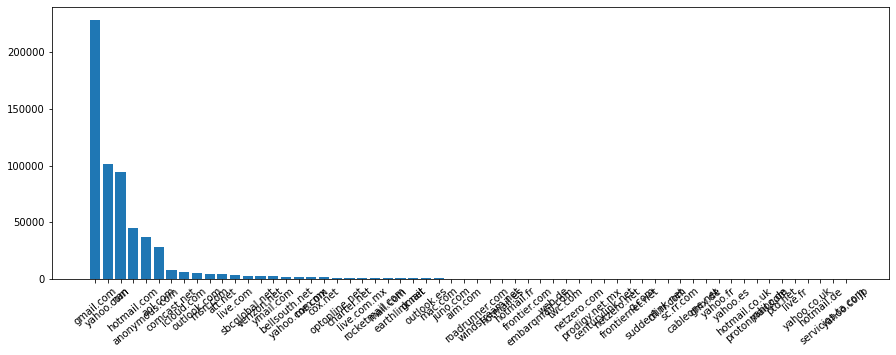

In [31]:
#
data = train['P_emaildomain'].value_counts(dropna =False)

plt.figure(figsize=(15,5))
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)
plt.show()

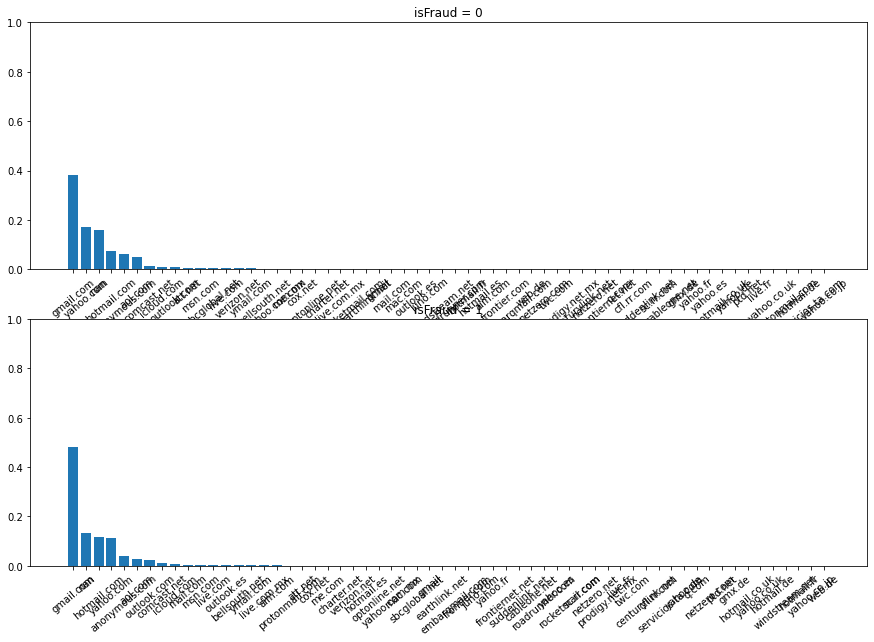

In [32]:
plt.figure(figsize=(15, 10),)
plt.subplot(211)
plt.ylim(0.0,1.0)
data = groupby_isFraud[0]['P_emaildomain'].value_counts(dropna =False)/groupby_isFraud[0].shape[0]
plt.title('isFraud = 0')
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)


plt.subplot(212)
plt.ylim(0.0,1.0)
data = groupby_isFraud[1]['P_emaildomain'].value_counts(dropna =False)/groupby_isFraud[1].shape[0]
plt.title('isFraud = 1')
plt.bar(np.array(data.index, dtype='str'), np.array(data.values))
plt.xticks(rotation=40)

plt.show()

On peut pas distinguer un pattern pour isFraud à partir de la colonne P_emaildomain. Alors on la supprime.

In [33]:
train.drop('P_emaildomain',axis = 1, inplace =True, errors='ignore')
test.drop('P_emaildomain',axis = 1, inplace =True, errors='ignore')

In [34]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Data columns (total 181 columns):
 #   Column          Dtype   
---  ------          -----   
 0   TransactionID   int64   
 1   isFraud         int64   
 2   TransactionDT   int64   
 3   TransactionAmt  float64 
 4   ProductCD       category
 5   card1           category
 6   card2           category
 7   card3           category
 8   card4           category
 9   card5           category
 10  card6           category
 11  addr1           category
 12  addr2           category
 13  C1              float64 
 14  C2              float64 
 15  C3              float64 
 16  C4              float64 
 17  C5              float64 
 18  C6              float64 
 19  C7              float64 
 20  C8              float64 
 21  C9              float64 
 22  C10             float64 
 23  C11             float64 
 24  C12             float64 
 25  C13             float64 
 26  C14             float64 
 27  D1           

In [35]:
categorical_columns = ['ProductCD']+[f'card{i}' for i in range(1, 7)] + ['addr1','addr2']
print(train[categorical_columns].isna().sum())
train[categorical_columns].value_counts();

ProductCD        0
card1            0
card2         8933
card3         1565
card4         1577
card5         4259
card6         1571
addr1        65706
addr2        65706
dtype: int64


In [36]:
train[categorical_columns].dropna(axis = 0, how ='any').shape

(514648, 9)

In [37]:
print(groupby_isFraud[0][categorical_columns].shape)
print(groupby_isFraud[1][categorical_columns].shape)
print("En suprimant toute ligne qui contient une valeur manquante")
# en cas on supprime toute ligne qui contient des valeurs manquantes
print(groupby_isFraud[0][categorical_columns].dropna(axis = 0, how ='any').shape)
print(groupby_isFraud[1][categorical_columns].dropna(axis = 0, how ='any').shape)


(569877, 9)
(20663, 9)
En suprimant toute ligne qui contient une valeur manquante
(502058, 9)
(12590, 9)


*** Si on procède de cette manière on va perdre trop de données. Essayant de voir autrement.

In [38]:
print(train.shape)
print(train.dropna(axis = 0, how ='any', thresh = 115).shape)

(590540, 181)
(521730, 181)


In [39]:
# fill with median & mode


https://dev.acquia.com/blog/how-to-handle-missing-data-in-machine-learning-5-techniques/09/07/2018/19651


https://www.datacamp.com/community/tutorials/categorical-data

#### Filling the missing Data

In [40]:
train['V63'].dtypes.name == 'float64'

True

In [41]:
train.set_index('TransactionID', inplace= True)
train.describe()

,isFraud,TransactionDT,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,514518.000000,501427.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,...,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000
mean,0.034990,7.372311e+06,135.027176,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215,94.347568,123.982137,163.744579,0.559711,0.599166,0.999500,0.122342,0.123460,0.134040,0.135363,0.816371,0.847843,0.129684,0.132292,1.034791,1.058097,0.977660,0.988040,0.000776,0.000830,0.387840,0.406436,0.140761,...,0.817171,0.991114,0.088543,1.167660,0.031492,0.358579,0.184350,0.235975,1.103011,1.659811,1.239916,0.942599,2.313863,1.433424,0.328917,0.089034,0.298829,0.171655,0.045507,0.052002,0.251761,0.283140,0.264208,1.000007,139.748713,408.682375,230.413180,10.995986,118.195658,4.202175,39.173910,21.351473,43.319174,26.806977,109.818544,247.606741,162.153398,18.372476,42.073133,28.326584
std,0.183755,4.617224e+06,239.162522,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262,157.660387,182.615225,202.726660,0.510533,0.532185,0.022345,0.332422,0.342841,0.364456,0.371763,0.425512,0.459451,0.339060,0.359415,0.247681,0.305485,0.185245,0.209302,0.028596,0.031133,0.510652,0.554311,0.355793,...,0.921880,1.558731,0.338424,3.282454,0.190939,1.078995,0.430989,0.599231,0.768897,16.252538,3.775050,20.588816,39.526468,25.962948,3.264745,0.628352,3.175062,1.724218,0.289573,0.318310,0.481889,0.623608,0.528238,0.002603,2348.849634,4391.992977,3021.924247,116.254277,352.983093,102.374938,172.128339,95.902970,173.619028,116.853222,2270.033202,3980.042828,2793.343636,332.304848,473.499307,382.053171
min,0.000000,8.640000e+04,0.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.027058e+06,43.321000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000

In [42]:
test.set_index('TransactionID', inplace=True)
test.describe()

,TransactionDT,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D4,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,...,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,5.066910e+05,506691.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,501943.000000,506688.000000,500660.000000,429840.000000,494146.000000,494622.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,...,500660.000000,500660.000000,506688.000000,506688.000000,506688.000000,506688.000000,500660.000000,500660.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,500660.000000,506688.000000,506688.000000,506688.000000,500660.000000,500660.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,500660.000000,500660.000000,500660.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000
mean,2.692994e+07,134.725568,10.093211,10.714635,0.027403,2.385875,4.962701,6.854992,1.678173,1.893994,4.611943,1.810149,7.484594,2.649486,27.816035,6.083890,108.207504,175.060799,159.810552,206.854137,0.569816,0.600435,0.999846,0.140963,0.142317,0.259778,0.261657,0.861490,0.885503,0.249799,0.254431,1.045493,1.069415,1.004693,1.012959,0.022649,0.022738,0.337185,0.352083,0.255544,...,0.825470,1.007614,0.087103,1.150909,0.030628,0.353792,0.187273,0.240742,1.119967,1.405097,1.211531,0.156935,0.456154,0.258579,0.242122,0.090622,0.201655,0.127406,0.056685,0.065931,0.286762,0.321849,0.301547,1.000002,83.783107,259.371829,136.949416,12.838856,127.198552,5.153783,42.733066,21.238136,43.269524,26.730428,42.077887,83.808337,56.090776,27.620156,46.835629,36.772511
std,4.756507e+06,245.779822,79.334782,88.896921,0.227753,41.942977,25.462195,46.783565,37.874827,26.766115,21.282640,23.692393,61.322505,53.973060,101.114033,28.315616,176.964526,250.417470,240.566557,269.419196,0.508138,0.536276,0.012401,0.361034,0.379262,0.461083,0.467456,0.392307,0.436220,0.438383,0.464469,0.289516,0.371149,0.133895,0.189354,0.150069,0.150903,0.493252,0.530969,0.452590,...,1.154029,1.560327,0.332353,2.724523,0.189638,0.940210,0.435739,0.614691,0.674471,3.652957,1.229239,0.925267,4.287307,1.624787,2.259073,0.775113,1.680034,1.090215,0.336923,0.370363,0.502396,0.639583,0.555264,0.001405,2706.035763,3643.584651,2976.740478,337.427648,606.911563,278.305451,467.654628,94.662615,195.591901,115.676311,2249.338097,2919.418027,2263.811948,999.900445,1514.927745,1486.814768
min,1.840322e+07,0.018000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.277154e+07,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [52]:
# test the output of mode method
print(train['ProductCD'].mode()[0])

W
0


In [44]:
# l'intersection des columns
intersection_columns = intersection(list(train.columns), list(test.columns))

for column in intersection_columns:
  if(train[column].dtype.name == 'category'):
    train[column].fillna(value=train[column].mode()[0], inplace=True)
    test[column].fillna(value=train[column].mode()[0], inplace=True)
  else:
    train[column].fillna(value=train[column].median(), inplace=True)
    test[column].fillna(value=train[column].median(), inplace=True)

In [45]:
# let just the intersection of the columns without forgetting the isFraud column in train data
train = train[intersection_columns+['isFraud']]
test = test[intersection_columns]

In [53]:
#nombre de valeur manquante après les remplacées 
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [46]:
train.head()

,V72,V124,V78,V127,V118,C6,V87,V110,V299,V288,V27,V305,V13,V308,V103,V289,V295,V318,C13,V108,C14,V115,V84,V59,V92,V136,C3,V301,C4,V98,card1,V113,V20,V126,V286,card3,V133,V63,V317,V60,...,V70,C1,V135,V76,V302,V313,V25,V319,TransactionAmt,V21,V28,V105,V296,V306,V23,V282,V112,V122,V285,V82,C9,V54,V77,V75,card4,V19,V102,V26,V53,V22,V15,V71,V315,V283,V100,V66,V132,V130,D15,isFraud
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0.0,1.0,1.0,117.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13926,1.0,1.0,0.0,0.0,150.0,117.0,0.0,117.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,68.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,discover,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2987001,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2755,1.0,1.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,mastercard,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2987002,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4663,1.0,1.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,visa,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,315.0,0
2987003,0.0,1.0,1.0,1758.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,925.0,24.0,0.0,24.0,790.0,25.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18132,1.0,1.0,50.0,0.0,150.0,1404.0,0.0,1404.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,50.0,0.0,0.0,0.0,0.0,50.0,1.0,0.0,1.0,1.0,10.0,1.0,1.0,1.0,1.0,1.0,mastercard,1.0,38.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,50.0,354.0,111.0,0
2987004,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4497,1.0,1.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,mastercard,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,52.0,0


In [47]:
test.head()

,V72,V124,V78,V127,V118,C6,V87,V110,V299,V288,V27,V305,V13,V308,V103,V289,V295,V318,C13,V108,C14,V115,V84,V59,V92,V136,C3,V301,C4,V98,card1,V113,V20,V126,V286,card3,V133,V63,V317,V60,...,V121,V70,C1,V135,V76,V302,V313,V25,V319,TransactionAmt,V21,V28,V105,V296,V306,V23,V282,V112,V122,V285,V82,C9,V54,V77,V75,card4,V19,V102,V26,V53,V22,V15,V71,V315,V283,V100,V66,V132,V130,D15
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,0.0,1.0,1.0,47.950001,1.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,115.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10409,1.0,0.0,0.000000,0.0,150.0,0.0,0.0,0.0,0.0,...,1.0,0.0,6.0,0.0,0.0,0.0,0.000000,0.0,0.0,31.95,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,6.0,0.0,1.0,0.0,visa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,47.950001,409.0
3663550,0.0,1.0,1.0,280.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,77.000000,0.0,0.0,0.0,0.0,12.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4272,1.0,1.0,0.000000,0.0,150.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,1.0,0.0,0.000000,1.0,0.0,49.00,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,1.0,4.0,1.0,2.0,0.0,1.0,1.0,visa,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,0.0,280.000000,634.0
3663551,0.0,1.0,2.0,968.000000,1.0,5.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,22.0,1.0,2.0,1.0,0.0,0.0,0.0,263.0,0.0,0.0,0.0,0.0,4476,1.0,1.0,0.000000,0.0,150.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.000000,1.0,0.0,171.00,0.0,0.0,2.0,2.0,0.000000,2.0,0.0,1.0,1.0,4.0,1.0,4.0,0.0,1.0,1.0,visa,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,705.000000,97.0
3663552,0.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.0,1.0,0.0,0.0,7.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10989,1.0,1.0,0.000000,0.0,150.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,0.0,1.0,0.0,282.540009,1.0,0.0,284.95,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,visa,1.0,0.0,1.0,1.0,0.0,0.0,0.0,282.540009,1.0,0.0,1.0,0.0,0.000000,242.0
3663553,0.0,1.0,1.0,183.850006,1.0,5.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,67.949997,0.0,1.0,0.0,0.0,14.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18018,1.0,1.0,67.949997,1.0,150.0,0.0,0.0,0.0,0.0,...,1.0,1.0,6.0,0.0,1.0,0.0,67.949997,1.0,0.0,67.95,0.0,0.0,0.0,0.0,67.949997,1.0,1.0,1.0,1.0,3.0,1.0,5.0,1.0,1.0,1.0,mastercard,1.0,0.0,1.0,1.0,0.0,0.0,0.0,67.949997,1.0,1.0,1.0,0.0,183.850006,22.0


### Correlation:  

In [48]:
corrMatrix = train.corr()

In [58]:
type(corrMatrix)
print(corrMatrix.iloc[0,0])

1.0


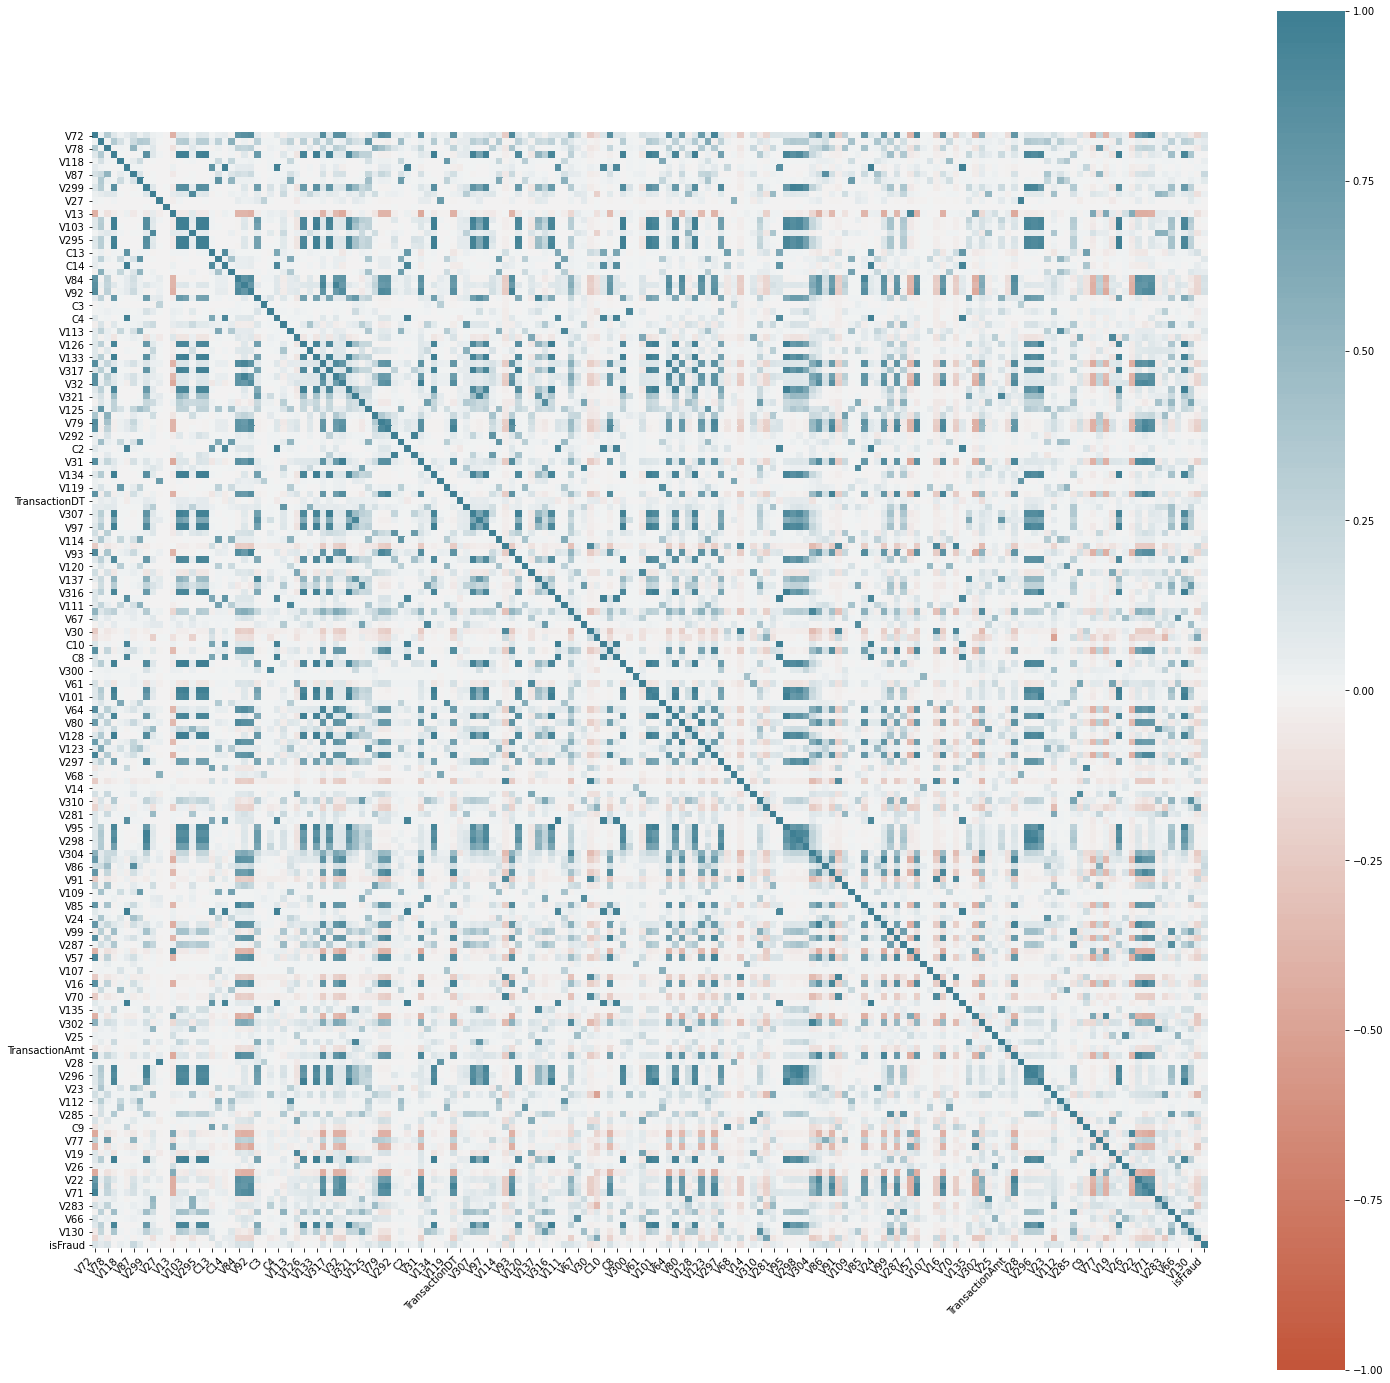

In [49]:
plt.figure(figsize=(25,25))
ax = sn.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Décomposition des données:


1.   Données d'Apprentissage:
2.   Données de Validation
3.   Donnéés du Test



In [60]:
train.to_csv("/content/drive/MyDrive/2020 2021/Projet ML/train_data.csv",sep=';', header=True, index=True)

In [59]:
test.to_csv("/content/drive/MyDrive/2020 2021/Projet ML/test_data.csv", sep=';',header=True, index=True)

In [62]:
test_ = pd.read_csv("/content/drive/MyDrive/2020 2021/Projet ML/test_data.csv", sep =';')
print(test_.shape)
test_.head()

(506691, 180)


,TransactionID,V72,V124,V78,V127,V118,C6,V87,V110,V299,V288,V27,V305,V13,V308,V103,V289,V295,V318,C13,V108,C14,V115,V84,V59,V92,V136,C3,V301,C4,V98,card1,V113,V20,V126,V286,card3,V133,V63,V317,...,V121,V70,C1,V135,V76,V302,V313,V25,V319,TransactionAmt,V21,V28,V105,V296,V306,V23,V282,V112,V122,V285,V82,C9,V54,V77,V75,card4,V19,V102,V26,V53,V22,V15,V71,V315,V283,V100,V66,V132,V130,D15
0,3663549,0.0,1.0,1.0,47.950001,1.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,115.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10409,1.0,0.0,0.000000,0.0,150.0,0.0,0.0,0.0,...,1.0,0.0,6.0,0.0,0.0,0.0,0.000000,0.0,0.0,31.95,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,6.0,0.0,1.0,0.0,visa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,47.950001,409.0
1,3663550,0.0,1.0,1.0,280.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,77.000000,0.0,0.0,0.0,0.0,12.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4272,1.0,1.0,0.000000,0.0,150.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,1.0,0.0,0.000000,1.0,0.0,49.00,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,1.0,4.0,1.0,2.0,0.0,1.0,1.0,visa,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,0.0,280.000000,634.0
2,3663551,0.0,1.0,2.0,968.000000,1.0,5.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,22.0,1.0,2.0,1.0,0.0,0.0,0.0,263.0,0.0,0.0,0.0,0.0,4476,1.0,1.0,0.000000,0.0,150.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.000000,1.0,0.0,171.00,0.0,0.0,2.0,2.0,0.000000,2.0,0.0,1.0,1.0,4.0,1.0,4.0,0.0,1.0,1.0,visa,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,705.000000,97.0
3,3663552,0.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,0.0,1.0,0.0,0.0,7.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10989,1.0,1.0,0.000000,0.0,150.0,0.0,0.0,0.0,...,1.0,1.0,5.0,0.0,1.0,0.0,282.540009,1.0,0.0,284.95,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,visa,1.0,0.0,1.0,1.0,0.0,0.0,0.0,282.540009,1.0,0.0,1.0,0.0,0.000000,242.0
4,3663553,0.0,1.0,1.0,183.850006,1.0,5.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,67.949997,0.0,1.0,0.0,0.0,14.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18018,1.0,1.0,67.949997,1.0,150.0,0.0,0.0,0.0,...,1.0,1.0,6.0,0.0,1.0,0.0,67.949997,1.0,0.0,67.95,0.0,0.0,0.0,0.0,67.949997,1.0,1.0,1.0,1.0,3.0,1.0,5.0,1.0,1.0,1.0,mastercard,1.0,0.0,1.0,1.0,0.0,0.0,0.0,67.949997,1.0,1.0,1.0,0.0,183.850006,22.0
